# Analyzing Predictors of the Best Male Tennis Player #

By: Ryan Saloff 

## Introduction ##
Fans of any professional sport are highly accustomed with the heated debates about who the “best player” is. Professional tennis is no exception to these nuanced discussions, given the types of statistics that are used to support an argument. The goal of this analysis is to make a regression model using a dataset of the “Player Stats for Top 500 Players” to identify if there are certain predictors that are associated with higher ranked tennis players, based on the chosen variables. In this dataset, each row represents one of the top 500 players from the Association of Tennis Professionals’ (ATP) ranking system, as of 2019. Columns in this dataset are either lists or vectors, in which the variables provide categorical and quantitative data. There are several columns with missing values, so this will be an important consideration before making the analysis.
    
### Methods ###
The number of professional players per capita in each country will be used as one of the predictors for the regression model. This predictor, among the other predictors, will be standardized in order for a fair comparison. Other predictors will include the hand the player swings with, as well as the average age of each player. Using the k-nearest neighbours algorithm, a number of attributes can be evaluated for the hypothetical best player (age difference, swinging arm, and professional players per capita). The RMPSE of this regression model will be calculated to evaluate the accuracy of the algorithm’s prediction. Furthermore, a visualization will be made to view how the k value affects the relationship between each predictor and the actual rank of each player. 

## Expected Outcomes and Significance ##
I expect that the RMPSE value will be less than a value that is made by a random prediction. Otherwise, I expect all of the selected predictors to have a positive correlation where the rank decreases (which is technically a higher rank) with a higher score for the predictor. This data analysis will be crucial for making more accurate predictions in sports, given the wide array of statistics available. Even in activities such as sports betting, a regression model can improve the probability of accurate predictions. In the real world, advanced algorithms will likely be more advantageous for different forms of betting, and it must be considered whether individuals should continue betting amid the progression of improvements in technology.    

## Preliminary Data Analysis ##

### Cleaning and Wrangling of the Dataset ###

In [1]:
# Installs and loads the packages used in the data analysis

install.packages("splitstackshape")
install.packages("kknn")
library(readxl)
library(tidyverse)
library(repr)
library(tidymodels)
library(splitstackshape)
library(kknn)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔

In [2]:
# Loads the dataset from the web

dataframe <- read.csv(url("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")) 

# Shows the first 10 columns of the untidy dataset

dataframe_10 <- dataframe |>
slice(1:10)

# Print table and table number

comment(dataframe_10) <- "Table 1: Untidy Data"

comment(dataframe_10)
dataframe_10

[1] "Table 1: Untidy Data"

X,Age,Country,Plays,Wikipedia,Current.Rank,Best.Rank,Name,Backhand,Prize.Money,⋯,Facebook,Twitter,Nicknames,Grand.Slams,Davis.Cups,Web.Site,Team.Cups,Olympics,Weeks.at.No..1,Tour.Finals
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,,,⋯,,,,NA,NA,,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,,,,NA,NA,,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,,,,NA,NA,,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,,,,NA,NA,,NA,NA,NA,NA
4,27 (21-10-1992),Australia,Right-handed,Wikipedia,183 (273),17 (11-01-2016),Bernard Tomic,Two-handed,"US$6,091,971",⋯,,,,NA,NA,,NA,NA,NA,NA
5,22 (11-02-1997),Poland,Right-handed,Wikipedia,31 (1398),31 (20-01-2020),Hubert Hurkacz,Two-handed,"$1,517,157",⋯,,,,NA,NA,,NA,NA,NA,NA
6,28 (18-11-1991),United States,Right-handed,Wikipedia,307 (131),213 (31-10-2016),Sekou Bangoura,Two-handed,"$278,709",⋯,,,,NA,NA,,NA,NA,NA,NA
7,21 (12-05-1998),"Taiwan, Province of China",Right-handed,Wikipedia,232 (205),229 (04-11-2019),Tung Lin Wu,Two-handed,"$59,123",⋯,,,,NA,NA,,NA,NA,NA,NA
8,25 (29-07-1994),Uzbekistan,Right-handed,Wikipedia,417 (81),253 (17-07-2017),Sanjar Fayziev,Two-handed,"$122,734",⋯,,,,NA,NA,,NA,NA,NA,NA


An initial glance at Table 1 reveals that there is a lot of untidy and unnecessary data. Since this dataframe does not contain clean and wrangled data, the first thing that needs to be done is to clean the dataset. This will be done by dropping the unnecessary columns and using a separate functionto ensure that each column shows only one value. 

In [3]:
# Removes unwanted columns

dataframe_cols <- dataframe |>
filter(Active == "Yes") |>
select(Age:Backhand, -Wikipedia, -Best.Rank)

options(repr.matrix.max.rows = 10) # Limits output of dataframes to 6 rows

# Renames the columns

colnames(dataframe_cols) <- c("Age", "Country", "Plays", "Current_Rank", "Name", "Backhand")

# Cleans the Age column

df2 <- separate(dataframe_cols,
         col= Age,
         into= c("Age","X"),
         sep=" ")

# Cleans the Current_Rank column

df3 <- separate(df2,
         col= Current_Rank,
         into= c("Current_Rank","Y"),
         sep=" ")


# Removes the added text to the column

df4 <- df3 |>
        select(-X, -Y)

# Removes the data with NA values from the Age column

df5 <- filter(df4, !is.na(Age))

# Adds a new column Rank with numeric data from Current_Rank

df6 <- mutate(df5, Rank = as.numeric(Current_Rank)) 

# Changes the data to be numeric in the Age column and removes the extra columns 

tennis <- df6 |>
        mutate(Age = as.numeric(Age)) |>
        select(-Current_Rank)

# Print table and table number

comment(tennis) <- "Table 2: Tidy Dataset"

comment(tennis)
tennis


[1] "Table 2: Tidy Dataset"

Age,Country,Plays,Name,Backhand,Rank
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
32,Slovakia,Right-handed,Lukas Lacko,Two-handed,178
21,"Korea, Republic of",Right-handed,Duck Hee Lee,Two-handed,236
27,Australia,Right-handed,Bernard Tomic,Two-handed,183
22,Poland,Right-handed,Hubert Hurkacz,Two-handed,31
21,"Taiwan, Province of China",Right-handed,Tung Lin Wu,Two-handed,232
⋮,⋮,⋮,⋮,⋮,⋮
18,"Taiwan, Province of China",Right-handed,Chun Hsin Tseng,Two-handed,299
28,Bosnia and Herzegovina,Right-handed,Mirza Basic,Two-handed,292
26,Bulgaria,Right-handed,Dimitar Kuzmanov,Two-handed,324


As seen in Table 2, at the end of wrangling, the new dataset has the following columns: Age, Country, Plays, Name, Backhand and Rank. These columns will be used in the data analysis.

### Top Players Summary Statistics ###

In [4]:
# Create a table that shows the top 10 ranked male professional tennis players

tennis_table <- select(tennis, Rank, Name) 
tennis_table_order <- arrange(tennis_table, by=(Rank)) |>
head(n=10)

# Print table and table number

comment(tennis_table_order) <- "Table 3: Top 10 Ranked Male Professional Tennis Players in 2019"

comment(tennis_table_order)
tennis_table_order

[1] "Table 3: Top 10 Ranked Male Professional Tennis Players in 2019"

,Rank,Name
,<dbl>,<chr>
1,1,Rafael Nadal
2,2,Novak Djokovic
3,3,Roger Federer
4,4,Daniil Medvedev
5,5,Dominic Thiem
6,6,Stefanos Tsitsipas
7,7,Alexander Zverev
8,8,Matteo Berrettini
9,9,Roberto Bautista Agut


By using the select and arrange functions, the dataframe is ordered in such a way that the rank is in ascending order, thus, giving the best players at the top. As seen in Table 3, the top 10 players of this dataframe were found using the head function and assigning n to 10.

### Average Age of Competitors Predictor ###

In order to perform this data analysis, the three predictors need to be created before training the dataset. The first predictor requires finding the mean of the competitors' age and subtracting the competitors' actual age with the mean.

In [5]:
# Find the average age of the top tennis players 

tennis_mean <- tennis |>
    summarize(Age = mean(Age)) |>
    pull(1)

# Create a new column with the age difference between the mean age and actual age

tennis_predictor1 <- tennis |>
    mutate(age_difference = (Age - tennis_mean))

# Print table and table number

comment(tennis_predictor1) <- "Table 4: Dataset with First Predictor Added"

comment(tennis_predictor1)
tennis_predictor1

[1] "Table 4: Dataset with First Predictor Added"

Age,Country,Plays,Name,Backhand,Rank,age_difference
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
32,Slovakia,Right-handed,Lukas Lacko,Two-handed,178,5.05673759
21,"Korea, Republic of",Right-handed,Duck Hee Lee,Two-handed,236,-5.94326241
27,Australia,Right-handed,Bernard Tomic,Two-handed,183,0.05673759
22,Poland,Right-handed,Hubert Hurkacz,Two-handed,31,-4.94326241
21,"Taiwan, Province of China",Right-handed,Tung Lin Wu,Two-handed,232,-5.94326241
⋮,⋮,⋮,⋮,⋮,⋮,⋮
18,"Taiwan, Province of China",Right-handed,Chun Hsin Tseng,Two-handed,299,-8.9432624
28,Bosnia and Herzegovina,Right-handed,Mirza Basic,Two-handed,292,1.0567376
26,Bulgaria,Right-handed,Dimitar Kuzmanov,Two-handed,324,-0.9432624


Using the mean function, the average age of a male professional tennis player has been computed. The average age of a male tennis player in this dataset is 27 years old. As seen in Table 4, the column `age_difference` shows the difference between the actual and mean age of a male professional tennis player.

### Swinging Arm Proportion Predictor ###

In [6]:
# Find how many total players are in this dataset (after cleaning and wrangling)

tennis_swinging_arm <- tennis_predictor1 |>
    count(Plays) |>
    arrange(desc(n)) |>
    slice(1:2)

tennis_count <- tennis_swinging_arm |>
    mutate(count = sum(n))

# Print table and table number

comment(tennis_count) <- "Table 5: Number of Tennis Players and Swinging Arm"

comment(tennis_count)
tennis_count

# Calculate the proportion of tennis players that use each swinging arm

tennis_proportion <- tennis_count |>
    mutate(plays_proportion = (n / count))

# Print table and table number

comment(tennis_proportion) <- "Table 6: Proportion of each Swinging Arm for Tennis Players"

comment(tennis_proportion)
tennis_proportion

right_handed <- tennis_proportion |>
    select(plays_proportion) |>
     slice(1) |>
    pull()

print(paste(right_handed, "is the proportion of top ranked tennis players that are right-handed."))
    
left_handed <- tennis_proportion |>
    select(plays_proportion) |>
    slice(2) |>
    pull()
    
print(paste(left_handed, "is the proportion of top ranked tennis players that are left-handed."))



[1] "Table 5: Number of Tennis Players and Swinging Arm"

Plays,n,count
<chr>,<int>,<int>
Right-handed,248,282
Left-handed,34,282


[1] "Table 6: Proportion of each Swinging Arm for Tennis Players"

Plays,n,count,plays_proportion
<chr>,<int>,<int>,<dbl>
Right-handed,248,282,0.8794326
Left-handed,34,282,0.1205674


[1] "0.879432624113475 is the proportion of top ranked tennis players that are right-handed."
[1] "0.120567375886525 is the proportion of top ranked tennis players that are left-handed."


As seen in Table 7, around 88% of the players in the dataset are right-handed while only 12% of the players are left-handed. This means that there is a greater proportion of the highest ranked tennis players in 2019 were right-handed.

In [7]:
# Add the proportions to the dataset with the first predictor

tennis_predictor2 <- tennis_predictor1 |>
    mutate(Swinging_Arm_Score = ifelse(Plays == "Right-handed", right_handed, left_handed)) |>
    arrange(Country)

# Print table and table number

comment(tennis_predictor2) <- "Table 7: Dataset with the First Two Predictors"

comment(tennis_predictor2)
tennis_predictor2

[1] "Table 7: Dataset with the First Two Predictors"

Age,Country,Plays,Name,Backhand,Rank,age_difference,Swinging_Arm_Score
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
31,Argentina,Right-handed,Juan Martin Del Potro,Two-handed,121,4.05673759,0.8794326
21,Argentina,Right-handed,Francisco Cerundolo,Two-handed,228,-5.94326241,0.8794326
27,Argentina,Right-handed,Diego Sebastian Schwartzman,Two-handed,14,0.05673759,0.8794326
28,Argentina,Right-handed,Guido Andreozzi,Two-handed,136,1.05673759,0.8794326
29,Argentina,Right-handed,Marco Trungelliti,Two-handed,202,2.05673759,0.8794326
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
34,Uruguay,Right-handed,Pablo Cuevas,One-handed,46,7.0567376,0.8794326
25,Uzbekistan,Right-handed,Sanjar Fayziev,Two-handed,417,-1.9432624,0.8794326
33,Uzbekistan,Right-handed,Denis Istomin,Two-handed,170,6.0567376,0.8794326


### Number of Top Tennis Players per Capita Predictor ###

For the third predictor, the number of top players per million people in each country will be determined. This is done to see if there is a relationship between how many professional players there are per capita and the rank of a professional player.

In [8]:
# Imports population spreadsheet from the web. 
# **Note that this data from the web has already been arranged based on the countries in the training dataset for convenience.

population_data <- read.csv(url("https://docs.google.com/spreadsheets/d/1jCGWEEuQldrlrhem8HjNWTcEN_FKg4bXjPOZoUpYi6Y/export?format=csv#gid=364456026")) 

# Finds how many players n are in each country

top_country <- tennis |>
    group_by(Country) |>
    summarize(n = n()) |>
    arrange(desc(n))

# Creates a new object with columns "Country", "n", and "Population"

population <- bind_cols(top_country, population_data)

# Adds a new column that shows n players per million in each country

tennis_predictor_tbl <- population |>
    mutate(n_per_million = (n / Population) * 1000000) 

# Print table and table number

comment(tennis_predictor_tbl) <- "Table 9: n per Capita for Each Country of Male Professional Tennis Players"

comment(tennis_predictor_tbl)
tennis_predictor_tbl


# Expands the object again so that it can be bound with the object that has the first two predictors

tennis_predictor_n <- tennis_predictor_tbl |>
    expandRows("n") |>
    arrange(Country) 

# Print table and table number

comment(tennis_predictor_n) <- "Table 10: Top 10 Ranked Male Professional Tennis Players in 2019"

comment(tennis_predictor_n)
tennis_predictor_n



tennis_all_predictors <- bind_cols(tennis_predictor2, tennis_predictor_n) |>
    mutate(Country = Country...9) |>
    select(-Country...2, -Country...9) |>
    ungroup()

comment(tennis_all_predictors) <- "Table 11: Dataset with All Predictors"

comment(tennis_all_predictors)
tennis_all_predictors


[1] "Table 9: n per Capita for Each Country of Male Professional Tennis Players"

Country,n,Population,n_per_million
<chr>,<int>,<dbl>,<dbl>
United States,24,331000000,0.07250755
France,21,65298930,0.32159792
Germany,21,83830972,0.25050407
Italy,19,60446035,0.31432996
Spain,17,46757980,0.36357430
⋮,⋮,⋮,⋮
Latvia,1,1882408,0.53123446
"Moldova, Republic of",1,4032294,0.24799779
Tunisia,1,11839918,0.08446004


[1] "Table 10: Top 10 Ranked Male Professional Tennis Players in 2019"

Country,Population,n_per_million
<chr>,<dbl>,<dbl>
Argentina,45267449,0.2650911
Argentina,45267449,0.2650911
Argentina,45267449,0.2650911
Argentina,45267449,0.2650911
Argentina,45267449,0.2650911
⋮,⋮,⋮
Uruguay,3475842,0.28770007
Uzbekistan,33551824,0.08941392
Uzbekistan,33551824,0.08941392


New names:
• `Country` -> `Country...2`
• `Country` -> `Country...9`


[1] "Table 11: Dataset with All Predictors"

Age,Plays,Name,Backhand,Rank,age_difference,Swinging_Arm_Score,Population,n_per_million,Country
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
31,Right-handed,Juan Martin Del Potro,Two-handed,121,4.05673759,0.8794326,45267449,0.2650911,Argentina
21,Right-handed,Francisco Cerundolo,Two-handed,228,-5.94326241,0.8794326,45267449,0.2650911,Argentina
27,Right-handed,Diego Sebastian Schwartzman,Two-handed,14,0.05673759,0.8794326,45267449,0.2650911,Argentina
28,Right-handed,Guido Andreozzi,Two-handed,136,1.05673759,0.8794326,45267449,0.2650911,Argentina
29,Right-handed,Marco Trungelliti,Two-handed,202,2.05673759,0.8794326,45267449,0.2650911,Argentina
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
34,Right-handed,Pablo Cuevas,One-handed,46,7.0567376,0.8794326,3475842,0.28770007,Uruguay
25,Right-handed,Sanjar Fayziev,Two-handed,417,-1.9432624,0.8794326,33551824,0.08941392,Uzbekistan
33,Right-handed,Denis Istomin,Two-handed,170,6.0567376,0.8794326,33551824,0.08941392,Uzbekistan


The number of male professional tennis players were counted in each country. Afterwards, the total number was divided by the total population (and multiplied by one million) in order to give a new column with the number of male professional tennis players per capita. We took this division as a chance of how probable a player is to make it on the list of top 500 from their country.

### Current Rank Summary Statistic ###

In [9]:
# Split the data into testing and testing sets stratified by tennis player's swinging arm

set.seed(122)

tennis_split <- initial_split(tennis_all_predictors, prop = 0.75)

tennis_training <- training(tennis_split) 

tennis_testing <- testing(tennis_split)

# Print table and table number

comment(tennis_training) <- "Table 12: Training Dataset"

comment(tennis_training)
tennis_training

[1] "Table 12: Training Dataset"

,Age,Plays,Name,Backhand,Rank,age_difference,Swinging_Arm_Score,Population,n_per_million,Country
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
40,19,Right-handed,Thiago Seyboth Wild,Two-handed,205,-7.943262,0.8794326,213000000,0.02347418,Brazil
201,24,Right-handed,Laslo Djere,Two-handed,40,-2.943262,0.8794326,8731081,1.03080020,Serbia
122,36,Right-handed,Philipp Kohlschreiber,One-handed,79,9.056738,0.8794326,83830972,0.25050407,Germany
63,23,Right-handed,Daniel Elahi Galan Riveros,Two-handed,186,-3.943262,0.8794326,50976248,0.05885094,Colombia
47,19,Right-handed,Felix Auger Aliassime,Two-handed,22,-7.943262,0.8794326,37799407,0.18518809,Canada
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
26,23,Right-handed,Lucas Miedler,One-handed,279,-3.94326241,0.8794326,9015361,0.55460896,Austria
180,21,Right-handed,Kacper Zuk,,401,-5.94326241,0.8794326,37839255,0.07928274,Poland
181,26,Right-handed,Joao Domingues,Two-handed,171,-0.94326241,0.8794326,10191409,0.29436558,Portugal


In [10]:
# Group by the number of countries n from the training set

sample_top_country <- tennis_training |>
    group_by(Country) |>
    summarize(n = n()) |>
    arrange(desc(n)) 

# Create a tibble that shows the top 10 countries with the most players from the training set

sample_top_country_10 <- sample_top_country |>
        slice(1:10) 


# Print table and table number

comment(sample_top_country_10) <- "Table 13: Top 10 Ranked Male Professional Tennis Players in 2019"

comment(sample_top_country_10)
sample_top_country_10

[1] "Table 13: Top 10 Ranked Male Professional Tennis Players in 2019"

Country,n
<chr>,<int>
United States,16
France,15
Germany,14
Italy,14
Spain,14
Argentina,10
Australia,7
Canada,7
Serbia,7


### Top Country from Sample Statistic ###

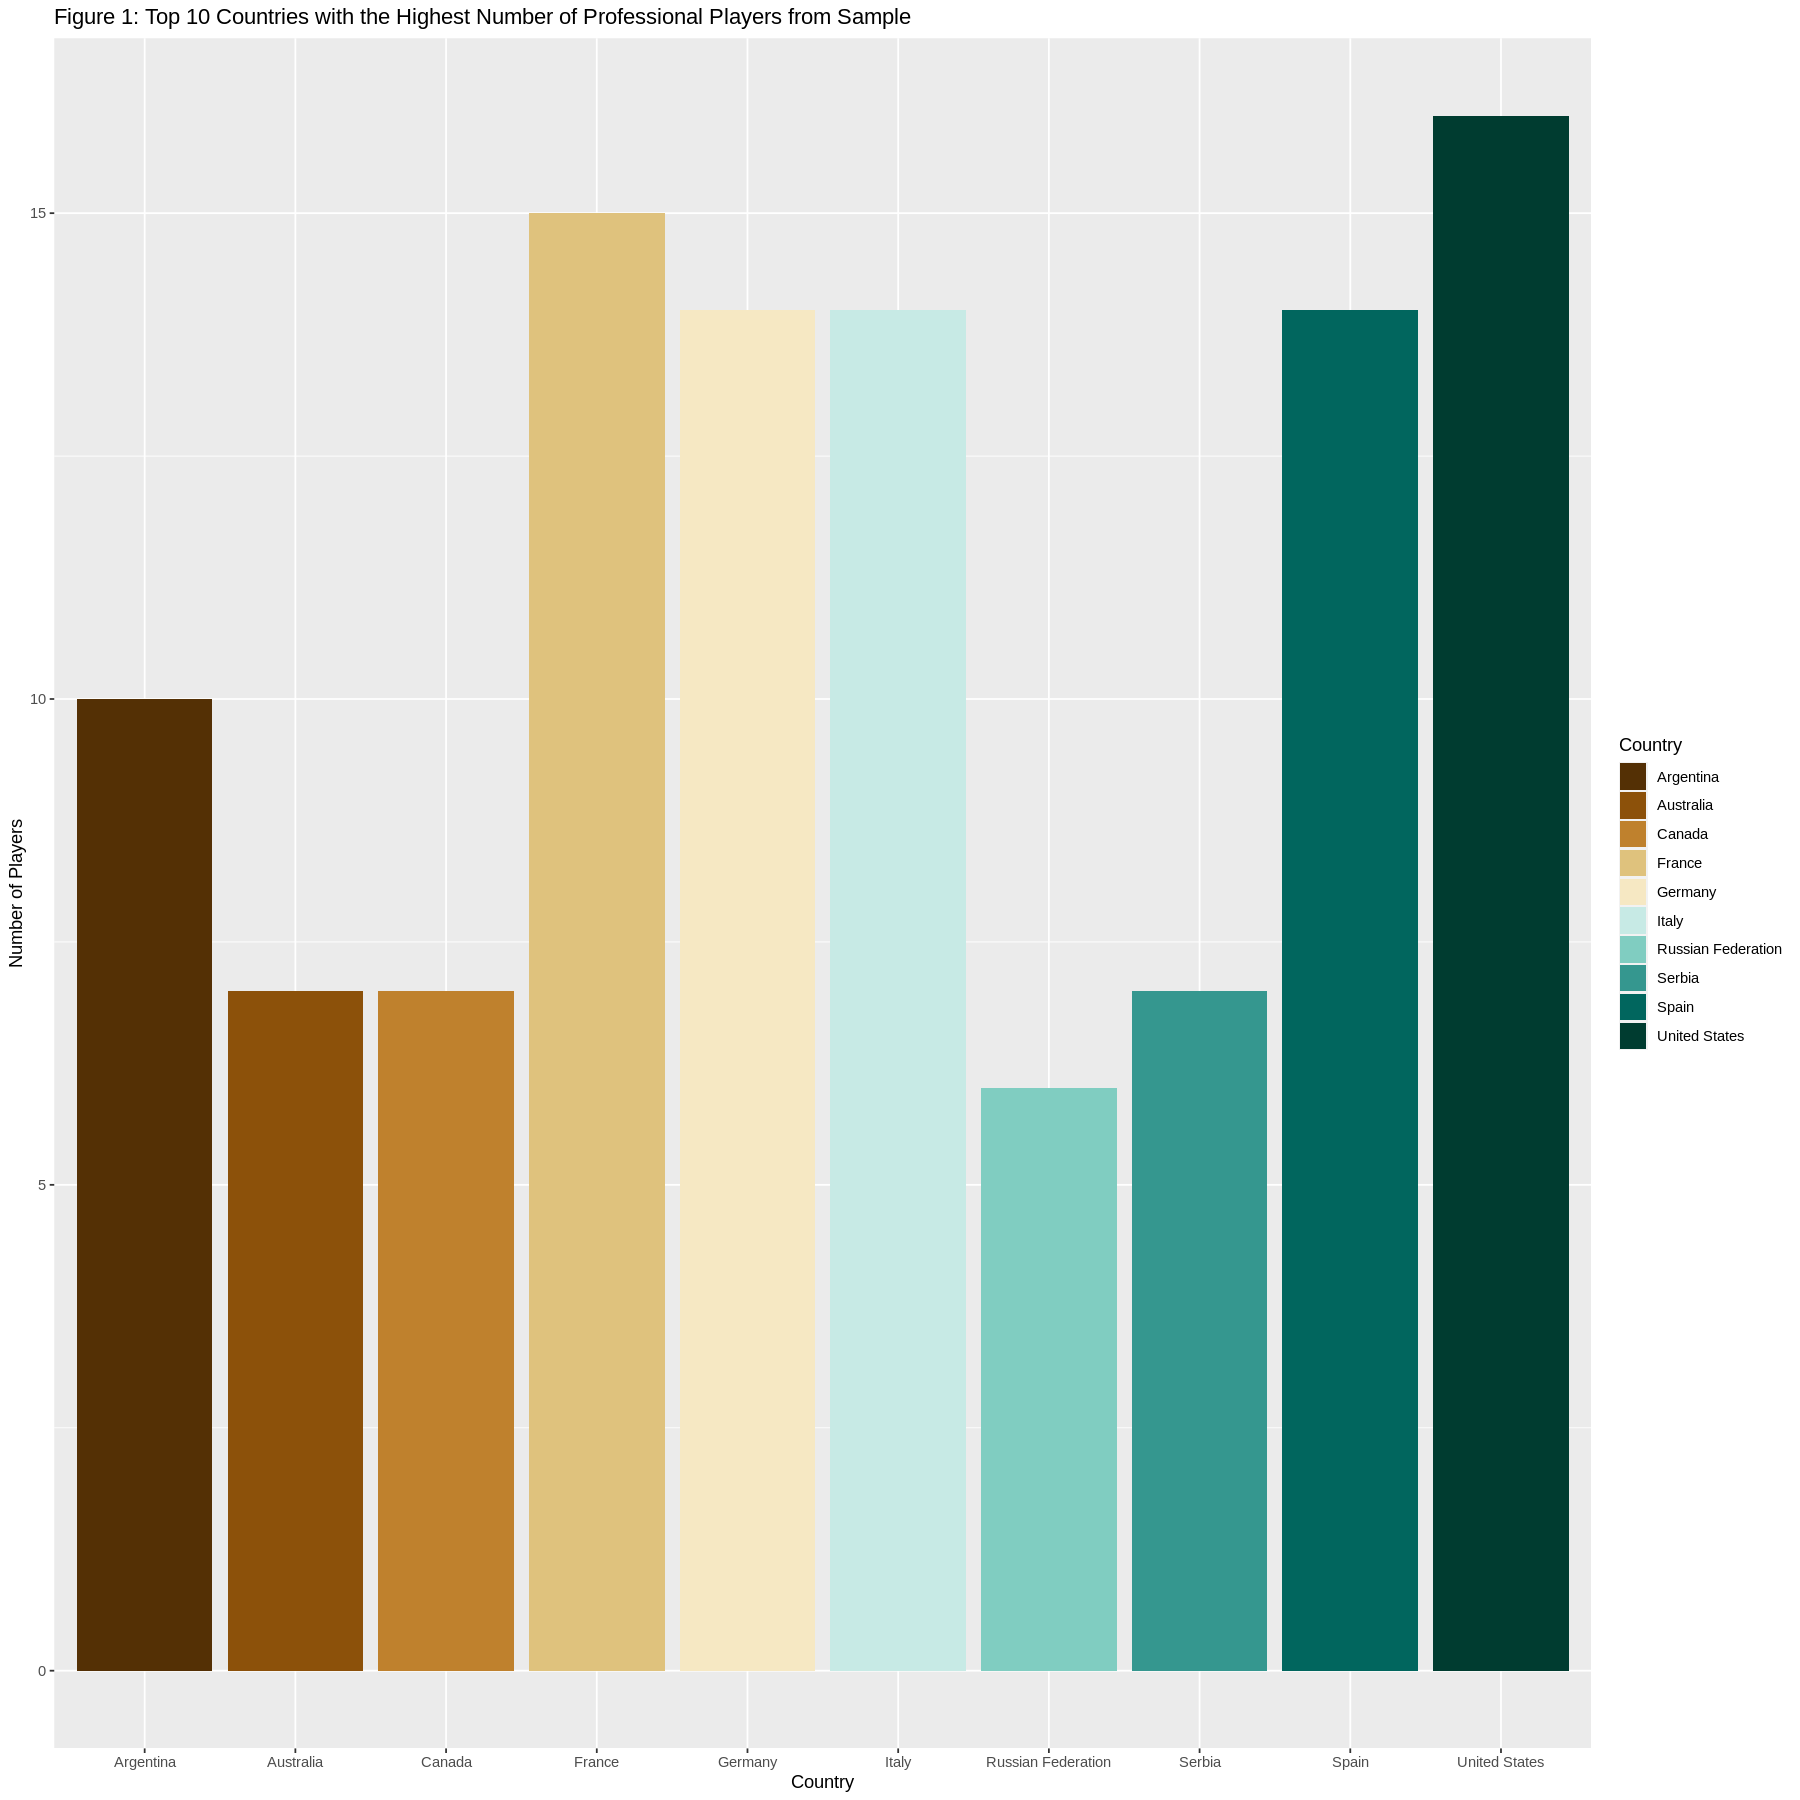

In [11]:
options(repr.plot.width=15, repr.plot.height=15)
top_country_plot <- ggplot(sample_top_country_10, aes(x= Country, y= n, fill=Country)) +
geom_bar(stat="identity") +
xlab("Country") +
ylab("Number of Players")+
labs(fill= "Country", title = "Figure 1: Top 10 Countries with the Highest Number of Professional Players from Sample")

top_country_plot <- top_country_plot + 
       scale_fill_brewer(palette = "BrBG")
top_country_plot


In Figure 1, a bar graph with the top 10 countries that have the most professional tennis players from the model's sample has been visualized. It can be seen that the United States has the most professional tennis players followed by France, Germany, and Italy.

## Data Analysis ##

### K-nn Regression Algorithm ###

In [12]:
# Creates the recipe and model for the cross-validation on the training set
set.seed(89)

tennis_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                 set_engine("kknn") |>
                 set_mode("regression")

tennis_recipe <- recipe(Rank ~ n_per_million + Swinging_Arm_Score + age_difference, data = tennis_training) |>
                   step_scale(all_predictors()) |>
                   step_center(all_predictors())

tennis_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [13]:
# Creates the workflow for a 10 fold cross-validation on the training dataset

set.seed(652)

tennis_vfold <- vfold_cv(tennis_training, v = 10)

tennis_workflow <- workflow() |>
        add_recipe(tennis_recipe) |>
        add_model(tennis_spec)

tennis_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [14]:
set.seed(1022)

# Performs a 10 fold cross-validation on the training dataset

grid_values <- tibble(neighbors = seq(1, 189))

tennis_results <- tennis_workflow |>
                        tune_grid(resamples = tennis_vfold, grid = grid_values) |>
                        collect_metrics()

# Print table and table number

comment(tennis_results) <- "Table 14: k-value Results Based on a 10-fold Cross Validation"

comment(tennis_results)
tennis_results

! Fold01: preprocessor 1/1, model 1/1: 189 samples were requested but there were 189 rows in the data. 184 will...

! Fold02: preprocessor 1/1, model 1/1: 189 samples were requested but there were 190 rows in the data. 185 will...

! Fold03: preprocessor 1/1, model 1/1: 189 samples were requested but there were 190 rows in the data. 185 will...

! Fold04: preprocessor 1/1, model 1/1: 189 samples were requested but there were 190 rows in the data. 185 will...

! Fold05: preprocessor 1/1, model 1/1: 189 samples were requested but there were 190 rows in the data. 185 will...

! Fold06: preprocessor 1/1, model 1/1: 189 samples were requested but there were 190 rows in the data. 185 will...

! Fold07: preprocessor 1/1, model 1/1: 189 samples were requested but there were 190 rows in the data. 185 will...

! Fold08: preprocessor 1/1, model 1/1: 189 samples were requested but there were 190 rows in the data. 185 will...

! Fold09: preprocessor 1/1, model 1/1: 189 samples were requested but th

[1] "Table 14: k-value Results Based on a 10-fold Cross Validation"

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,142.04954457,10,6.85295325,Preprocessor1_Model001
1,rsq,standard,0.05924079,10,0.02166716,Preprocessor1_Model001
2,rmse,standard,132.76672270,10,6.97464095,Preprocessor1_Model002
2,rsq,standard,0.05564085,10,0.01341830,Preprocessor1_Model002
3,rmse,standard,124.54221154,10,7.15351380,Preprocessor1_Model003
⋮,⋮,⋮,⋮,⋮,⋮,⋮
187,rsq,standard,0.05893360,10,0.026251032,Preprocessor1_Model187
188,rmse,standard,114.63797437,10,4.585632345,Preprocessor1_Model188
188,rsq,standard,0.05385814,10,0.018530866,Preprocessor1_Model188


In [15]:
set.seed(828)

# Finds the best k value based on the minimum value for RMPSE

tennis_min <- tennis_results |>
    filter(.metric == "rmse") |>
    arrange(mean)  |> 
    slice(1)

# Print table and table number

comment(tennis_min) <- "Table 15: Best k-value"

comment(tennis_min)
tennis_min

# Prints the best k value

k_min <- tennis_min |>
    pull(neighbors)
k_min


[1] "Table 15: Best k-value"

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
84,rmse,standard,113.3214,10,4.921623,Preprocessor1_Model084


[1] 84

From the cross-validation on the training dataset, the k nearest neighbour value that has the greatest reduction in errors is equal to **84**. This value will be used for the regression model.

In [16]:
# Creates a summary of the regression model's accuracy

tennis_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
                            set_engine("kknn") |>
                            set_mode("regression")

tennis_best_fit <- workflow() |>
                        add_recipe(tennis_recipe) |>
                        add_model(tennis_best_spec) |>
                        fit(data = tennis_training)

tennis_summary <- tennis_best_fit |> 
                       predict(tennis_testing) |>
                       bind_cols(tennis_testing) |>
                       metrics(truth = Rank, estimate = .pred) 
# Print table and table number

comment(tennis_summary) <- "Table 16: Summary Statistics when K = 84"

comment(tennis_summary)
tennis_summary


[1] "Table 16: Summary Statistics when K = 84"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.235997e+02
rsq,standard,3.766488e-03
mae,standard,1.048585e+02


In [17]:
# Assesses the accuracy of the knn-regression using the RMPSE

rmse <- tennis_summary |>
    slice(1) |>
    pull(.estimate)

rmse

[1] 123.5997

[1] "Table 17: Rank Predictions"

.pred,Age,Plays,Name,Backhand,Rank,age_difference,Swinging_Arm_Score,Population,n_per_million,Country
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
193.6548,19,Right-handed,Thiago Seyboth Wild,Two-handed,205,-7.943262,0.8794326,213000000,0.02347418,Brazil
162.5357,24,Right-handed,Laslo Djere,Two-handed,40,-2.943262,0.8794326,8731081,1.03080020,Serbia
152.8452,36,Right-handed,Philipp Kohlschreiber,One-handed,79,9.056738,0.8794326,83830972,0.25050407,Germany
192.3333,23,Right-handed,Daniel Elahi Galan Riveros,Two-handed,186,-3.943262,0.8794326,50976248,0.05885094,Colombia
193.6071,19,Right-handed,Felix Auger Aliassime,Two-handed,22,-7.943262,0.8794326,37799407,0.18518809,Canada
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
167.0000,23,Right-handed,Lucas Miedler,One-handed,279,-3.94326241,0.8794326,9015361,0.55460896,Austria
192.4762,21,Right-handed,Kacper Zuk,,401,-5.94326241,0.8794326,37839255,0.07928274,Poland
171.0833,26,Right-handed,Joao Domingues,Two-handed,171,-0.94326241,0.8794326,10191409,0.29436558,Portugal


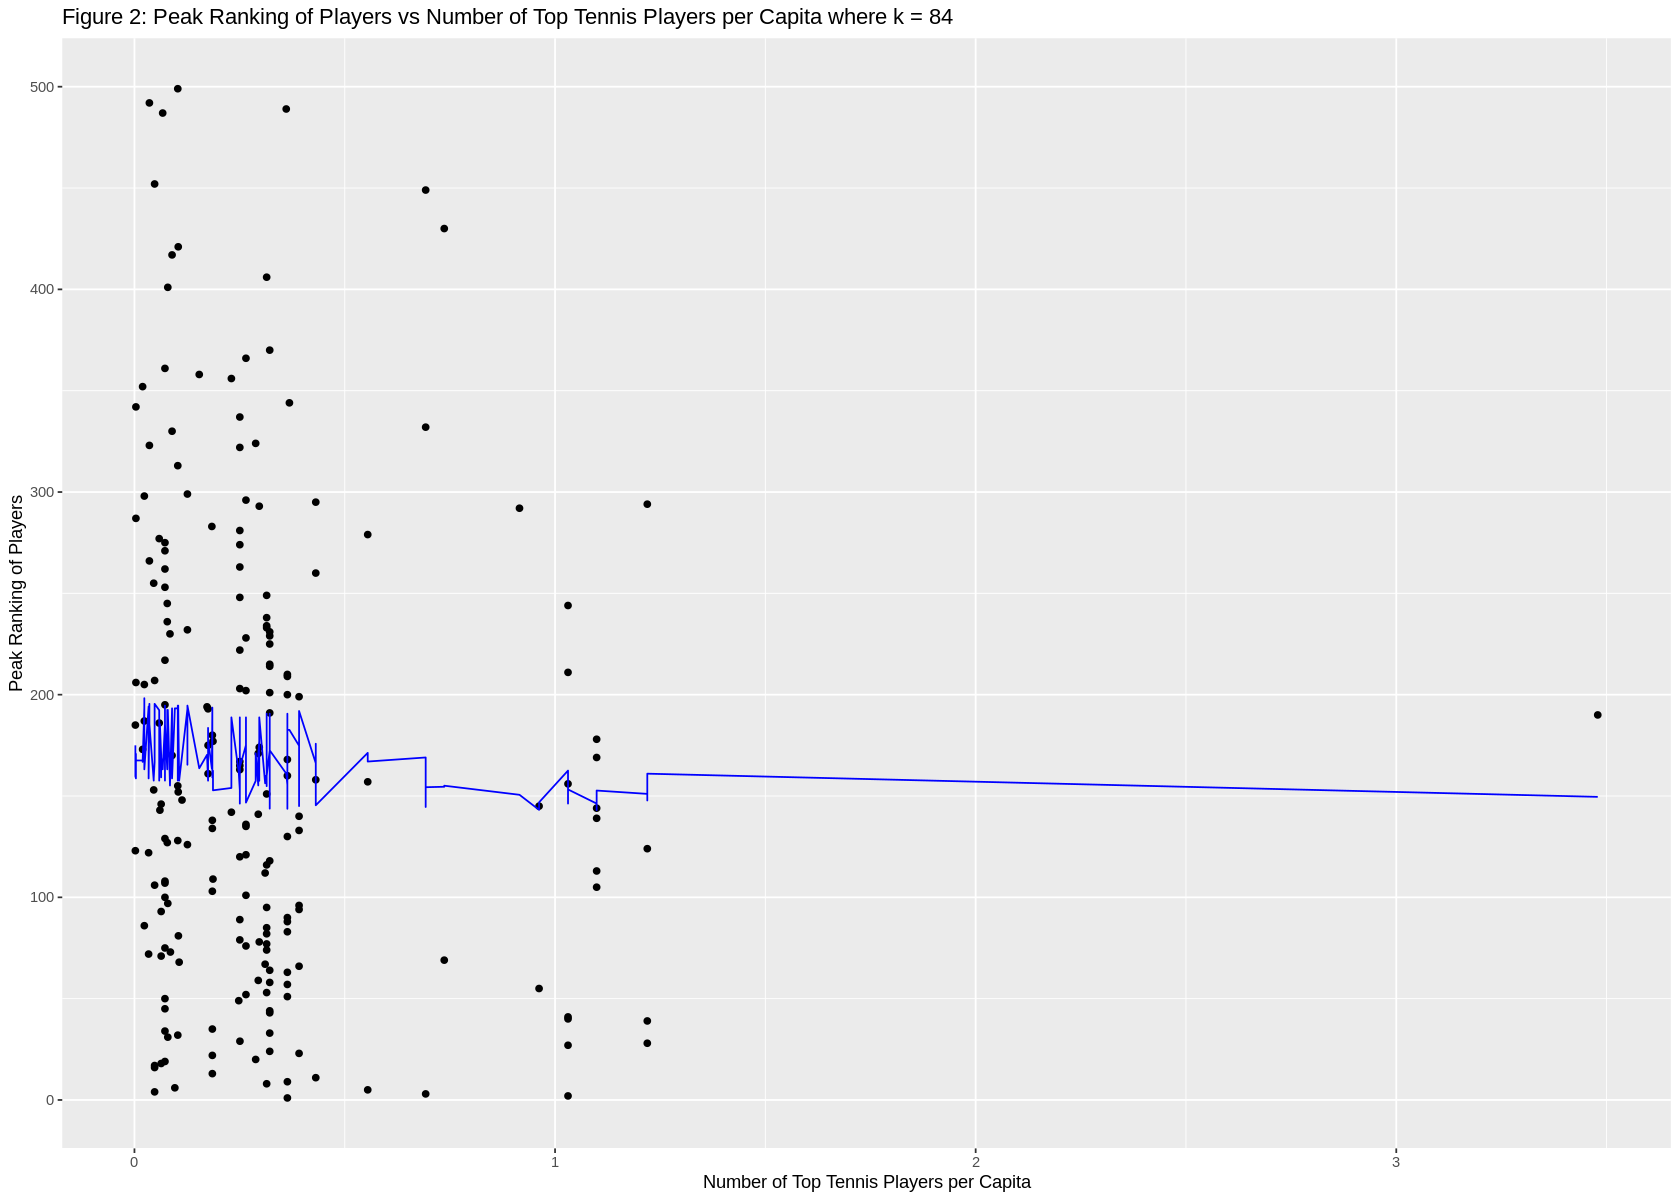

In [18]:
options(repr.plot.width = 14, repr.plot.height = 10)

# Creates a table with the predicted rank

tennis_preds <- tennis_best_fit |>
    predict(tennis_training) |>
    bind_cols(tennis_training)

# Print table and table number

comment(tennis_preds) <- "Table 17: Rank Predictions"

comment(tennis_preds)
tennis_preds

# Creates a plot based on the regression model for the n per million predictor

tennis_plot_1 <- tennis_training |>
    ggplot(aes(x= n_per_million, y= Rank))+
    geom_point()+
geom_line(color= "blue",
          data= tennis_preds,
          mapping =aes(x=n_per_million, y=.pred))+
labs(x= "Number of Top Tennis Players per Capita", y="Peak Ranking of Players")+
ggtitle("Figure 2: Peak Ranking of Players vs Number of Top Tennis Players per Capita where k = 84")
tennis_plot_1

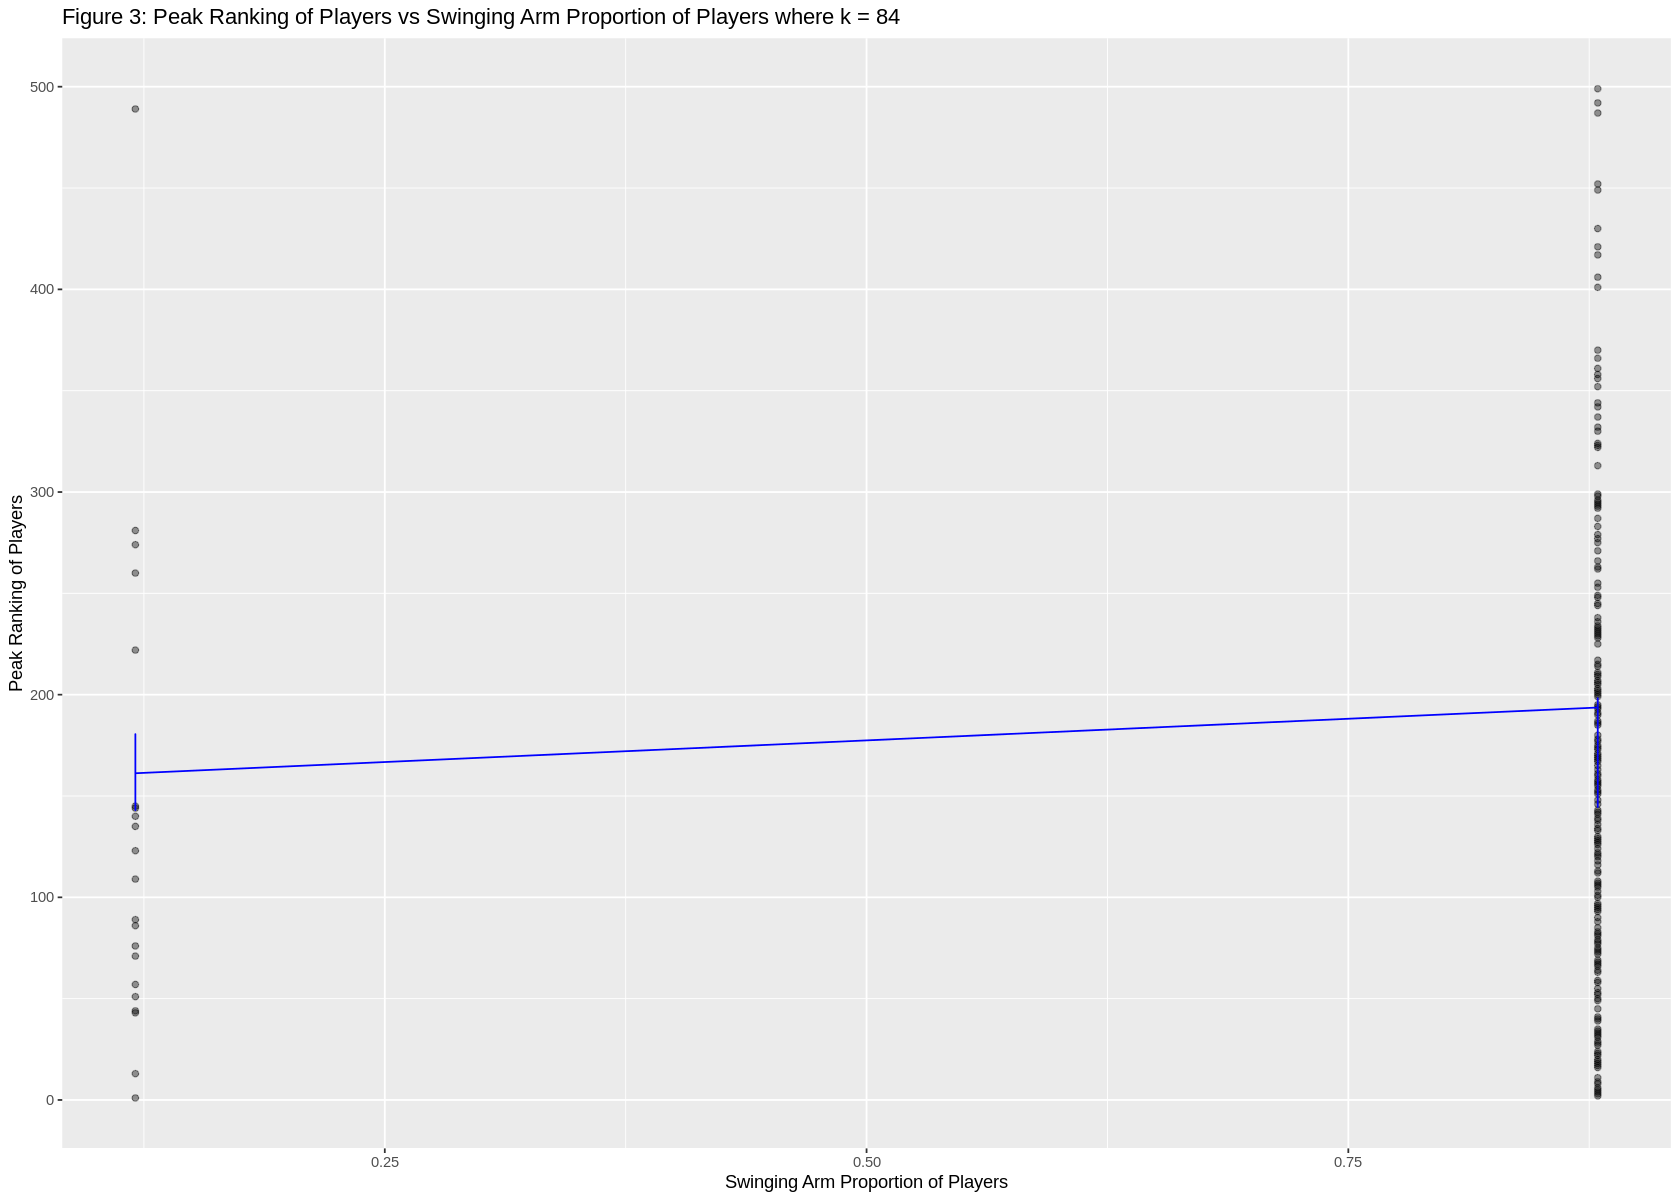

In [19]:
# Creates a plot based on the regression model for the swinging arm proportion of players

options(repr.plot.width = 14, repr.plot.height = 10)
tennis_plot_2 <- tennis_training |>
    ggplot(aes(x= Swinging_Arm_Score, y= Rank))+
    geom_point(alpha=0.4)+
geom_line(color= "blue",
          data= tennis_preds,
          mapping =aes(x=Swinging_Arm_Score, y=.pred))+
labs(x= "Swinging Arm Proportion of Players", y="Peak Ranking of Players")+
ggtitle("Figure 3: Peak Ranking of Players vs Swinging Arm Proportion of Players where k = 84")
tennis_plot_2

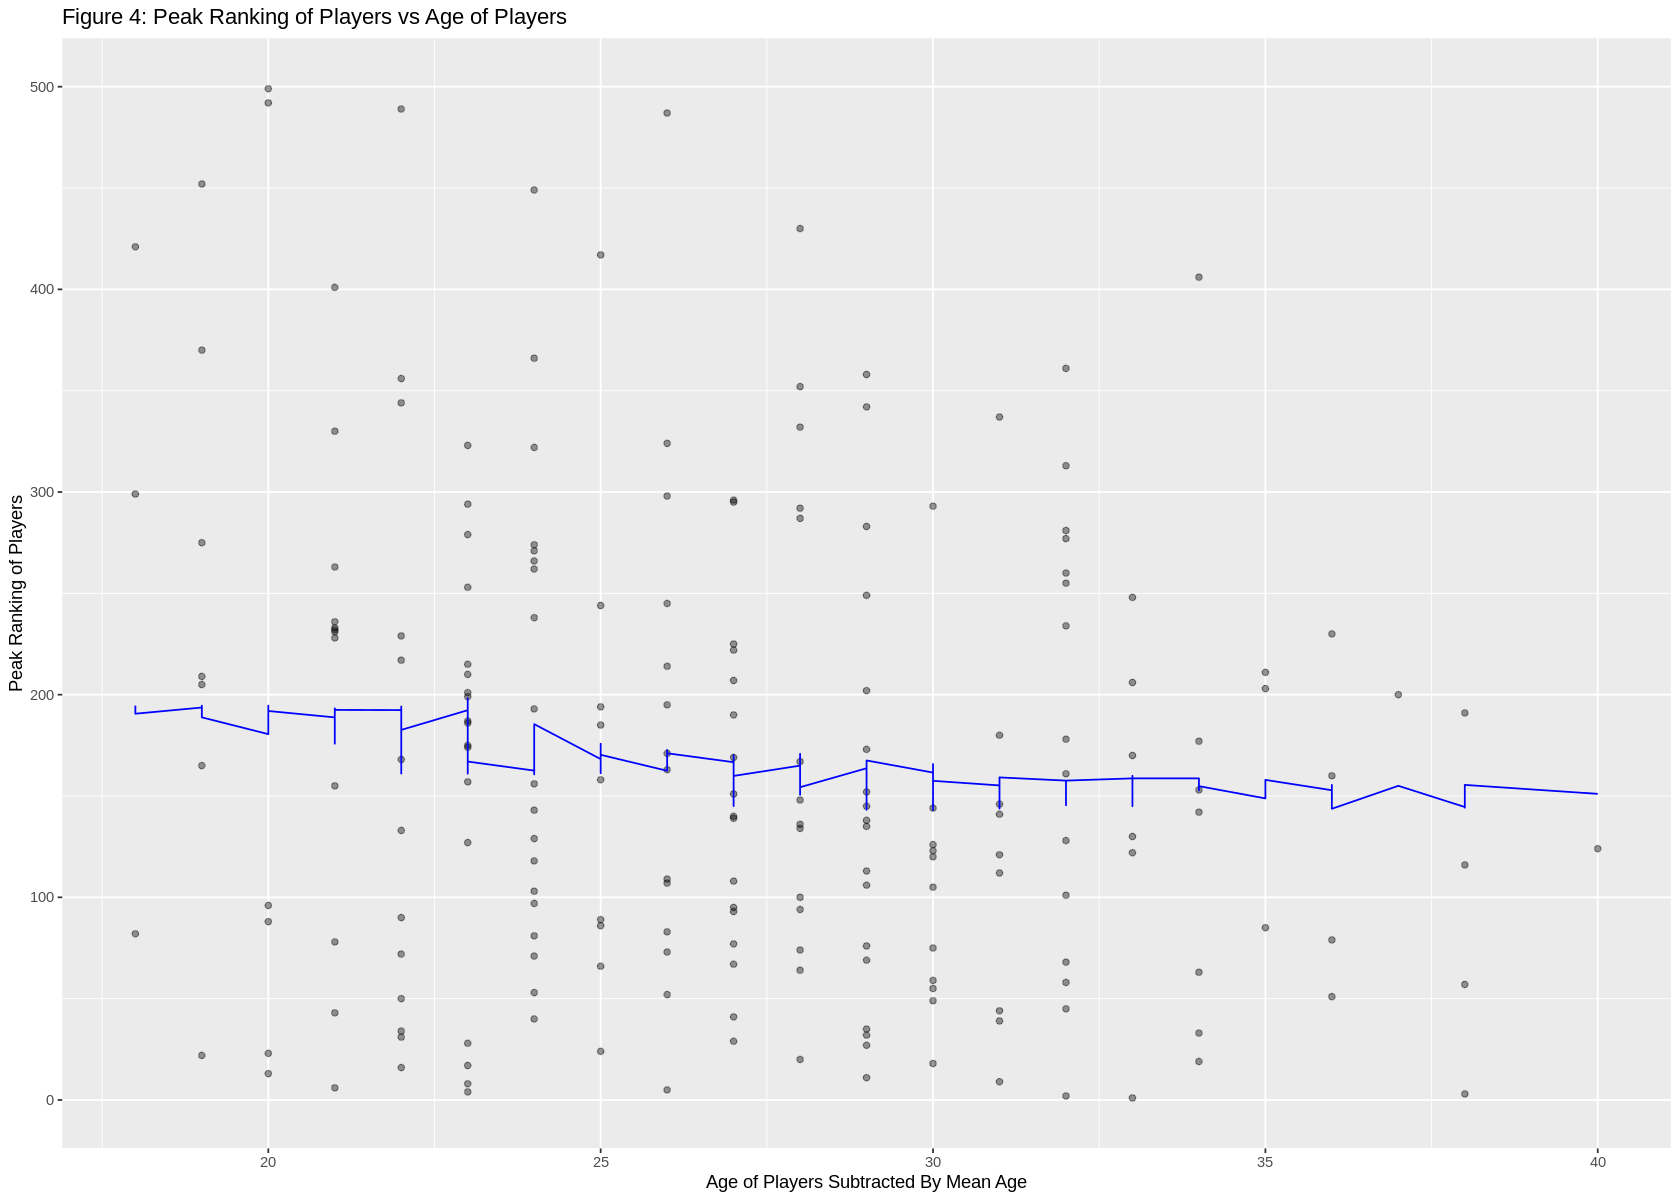

In [20]:
# Creates a plot based on the regression model for the difference in age to the mean age predictor

options(repr.plot.width = 14, repr.plot.height = 10)
tennis_plot_3 <- tennis_training |>
    ggplot(aes(x= Age, y= Rank))+
    geom_point(alpha=0.4)+
geom_line(color= "blue",
          data= tennis_preds,
          mapping =aes(x=Age, y=.pred))+
labs(x= "Age of Players Subtracted By Mean Age", y="Peak Ranking of Players")+
ggtitle("Figure 4: Peak Ranking of Players vs Age of Players")
tennis_plot_3

## Discussion ## 

In Figure 2, there is a weak positive correlation between the peak ranking and the number of professional tennis players per capita. This is because of the visualization in Figure 2 — as the number of top tennis players per capita increases, the model predicts a higher rank (considering that 1 is the best rank).

In  Figure 3, a weak negative correlation can be observed between the peak ranking and the swinging arm proportion. From this figure, it is observed that left-handed players are predicted to have a better ranking than right-handed players. This was not expected as there is a much higher number of professional right-handed players, so the chance of the best player being right-handed was more probable.

In Figure 4, there is a weak positive correlation between the age difference of players and their peak ranking. From this figure, it is observed that as the players get older, they are predicted to have a better rank. This is what was expected as the older players get, the more experience they have.

### Expected Outcome ###

The outcomes from this data analysis produced results that were mostly expected before the analysis was performed.

As expected for this analysis, the predictor for the number of professional tennis players per capita and the predictor for the age difference of players had a positive correlation with peak rank, albeit a weak relationship. However, the third predictor for the swinging arm proportion had a negative correlation with peak rank. This is an essential consideration for evaluating the efficacy of the regression model. It is plausible that this predictor is not applicable for a prediction of rank; this analysis has helped to identify which predictors are useful to improve the model's prediction.

The RMPSE value is ~123 for a dataset containing 288 players. Given that the RMPSE value is lower than 144, this is a good outcome as the model's prediction is more effective than a random guess.

In the case of soccer, participants base their bets off of player characteristics such as the body measurements, passing accuracy, agility, reaction and aggression of each player (Stübinger et al., 2019). This helps them determine who the best player is according to these characteristics, and developing an effective regression model for player characteristics in tennis with a lower RMPSE value may improve these bets.

### Reflection ### 

So what are the real-world implications of this data analysis? None of the selected characteristics illustrate a strong correlation of better player. In some ways, this makes sense. There is no one trait that makes a player better than the next; it's an accumulation of many variables that determines the quality of a player. Each player has a nearly unique combination of these variables. The only consistent aspect of all great tennis players is the dedication and perseverance they demonstrate in the sport, which aligns quite well with what we know as a society: success comes from effort, not from luck or genetics. Anyone can play in the big leagues, it just takes commitment and hard work.


Inspirational motivations aside, what are some questions that can be asked with the new findings? One of the weaker trends seems to be that older players perform better. Though this prediction is about age, it most likely correlates to time more accurately. Older players have had more time with the sport, and more time to get better. Some say you need ten years to master a skill, which these older players have well surpassed. An interesting follow-up to these findings would be to see how time put in affects who gets ranked best. It really is the only logical metric that can be used to compare players, and even then the quality of the time put in can be brought to question. I strongly believe that a more comprehensive dataset will provide variables that can be used to create highly accurate predictions for sports betting, given the success of the regression model's prediction from this data analysis. An important consideration for future research is how the development of highly accurate prediction algorithms will affect the future growth of the sports betting industry.

## References ##

Findley, Kate. ‘How Long Does It Take to Achieve Mastery in a Skill?’ Wondrium Daily, 31 Aug. 2020, https://www.wondriumdaily.com/how-long-does-it-take-to-achieve-mastery-in-a-skill/.

Population by Country - 2020. https://www.kaggle.com/datasets/tanuprabhu/population-by-country-2020. Accessed 7 Dec. 2022.

Staff, T. C. ‘What Makes A Good Tennis Player?’ Tennis Connected, 25 Nov. 2020, https://tennisconnected.com/home/2020/11/25/what-makes-a-good-tennis-player/.

https://docs.google.com/spreadsheets/d/1jCGWEEuQldrlrhem8HjNWTcEN_FKg4bXjPOZoUpYi6Y/export?format=csv#gid=364456026 
